In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
books = pd.read_csv('/content/drive/MyDrive/IR/dataset/BX-Books.csv', sep = ';', usecols = ["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"], encoding = "latin-1")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
book_rating = pd.read_csv('/content/drive/MyDrive/IR/dataset/BX-Book-Ratings.csv', sep = ';', usecols = ["User-ID", "ISBN", "Book-Rating"], encoding = "latin-1")

In [ ]:
book_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
book_rating.rename(columns = {'Book-Rating':'bookRating'}, inplace = True)

In [ ]:
book_rating.head()

,User-ID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


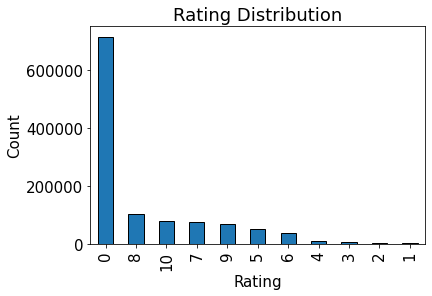

In [ ]:
book_rating.bookRating.value_counts(sort = True).plot(kind = 'bar', edgecolor = "black")
plt.title('Rating Distribution'), plt.xlabel('Rating'), plt.ylabel('Count')
plt.show()

The ratings are unevenly distributed and most of the books are rated 0 (Sparse data).

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/IR/dataset/BX-Users.csv', sep = ';', usecols = ["User-ID","Age"], encoding = "latin-1")

In [ ]:
users

,User-ID,Age
0,1,NaN
1,2,18.0
2,3,NaN
3,4,17.0
4,5,NaN
...,...,...
278853,278854,NaN
278854,278855,50.0
278855,278856,NaN
278856,278857,NaN


In [ ]:
print(books.shape)
print(book_rating.shape)
print(users.shape)

(271379, 5)
(1149780, 3)
(278858, 2)


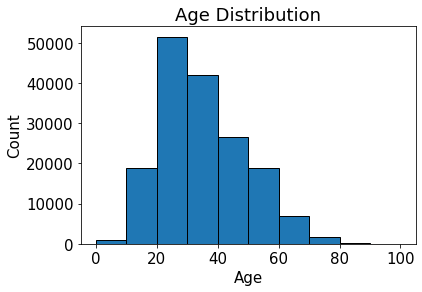

In [ ]:
users.Age.hist(bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], edgecolor = "black")
plt.title('Age Distribution'), plt.xlabel('Age'), plt.ylabel('Count'), plt.grid(False)
plt.show()

In [ ]:
relevant_users = book_rating['User-ID'].value_counts() >= 200
indexes_relevant_users = relevant_users[relevant_users].index
indexes_relevant_users

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
             28634,  59727, 268622, 188951, 225595,  83671, 252827,  99955,
             36554,  26883],
           dtype='int64', length=905)

In [ ]:
relevant_ratings = book_rating[book_rating['User-ID'].isin(indexes_relevant_users)]
ratings_with_books = relevant_ratings.merge(books, on = 'ISBN')

In [ ]:
ratings_with_books

,User-ID,ISBN,bookRating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
488751,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
488752,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
488753,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
488754,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [ ]:
rating_frequency = ratings_with_books.groupby('Book-Title')['bookRating'].count().reset_index()

In [ ]:
rating_frequency

,Book-Title,bookRating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160582,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160583,Ã?Â?lpiraten.,1
160584,Ã?Â?rger mit Produkt X. Roman.,1
160585,Ã?Â?stlich der Berge.,1


In [ ]:
rating_frequency.rename(columns = {'bookRating':'Number of Ratings'}, inplace = True)

In [ ]:
rating_frequency

,Book-Title,Number of Ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160582,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160583,Ã?Â?lpiraten.,1
160584,Ã?Â?rger mit Produkt X. Roman.,1
160585,Ã?Â?stlich der Berge.,1


In [ ]:
final_ratings = ratings_with_books.merge(rating_frequency, on = 'Book-Title')

In [ ]:
final_ratings

,User-ID,ISBN,bookRating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Number of Ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
488751,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
488752,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
488753,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
488754,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [ ]:
final_ratings = final_ratings[final_ratings['Number of Ratings'] >= 50]
final_ratings.drop_duplicates(['User-ID','Book-Title'], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
final_ratings

,User-ID,ISBN,bookRating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Number of Ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
237119,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,50
237120,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,50
237121,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,50
237122,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,50


In [ ]:
pivoted_books = final_ratings.pivot_table(columns = 'User-ID', index = 'Book-Title', values = 'bookRating')
pivoted_books.fillna(0, inplace = True)

In [ ]:
pivoted_books

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
book_sparse = csr_matrix(pivoted_books)
model = NearestNeighbors(algorithm = 'brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# Function that returns the book names 

def recommend_book(book_name):

    book_id = np.where(pivoted_books.index == book_name)[0][0]

    book_list = dist, sugg = model.kneighbors(pivoted_books.iloc[book_id, :].values.reshape(1, -1), n_neighbors = 6)
    
    # Looping over suggestions

    for i in range(len(book_list)):

      if not i:

        print(pivoted_books.index[sugg[i]])

In [ ]:
recommend_book('Exclusive')

Index(['Exclusive', 'The Cradle Will Fall', 'The Long Road Home',
       'Jacob Have I Loved', 'No Safe Place', 'Eyes of a Child'],
      dtype='object', name='Book-Title')


In [ ]:
recommend_book('And Then You Die')

Index(['And Then You Die', 'Long After Midnight', 'No Safe Place', 'Exclusive',
       'The Most Wanted', 'Executive Orders (Jack Ryan Novels)'],
      dtype='object', name='Book-Title')


In [ ]:
recommend_book('1984')

Index(['1984', 'No Safe Place', 'A Civil Action', 'Foucault's Pendulum',
       'Long After Midnight', 'Abduction'],
      dtype='object', name='Book-Title')


In [ ]:
recommend_book('You Belong To Me')

Index(['You Belong To Me', 'Exclusive', 'The Cradle Will Fall',
       'Loves Music, Loves to Dance', 'While My Pretty One Sleeps',
       'Before I Say Good-Bye'],
      dtype='object', name='Book-Title')


In [ ]:
recommend_book('While My Pretty One Sleeps')

Index(['While My Pretty One Sleeps', 'The Cradle Will Fall', 'Exclusive',
       'Long After Midnight', 'No Safe Place', 'Dragon Tears'],
      dtype='object', name='Book-Title')
